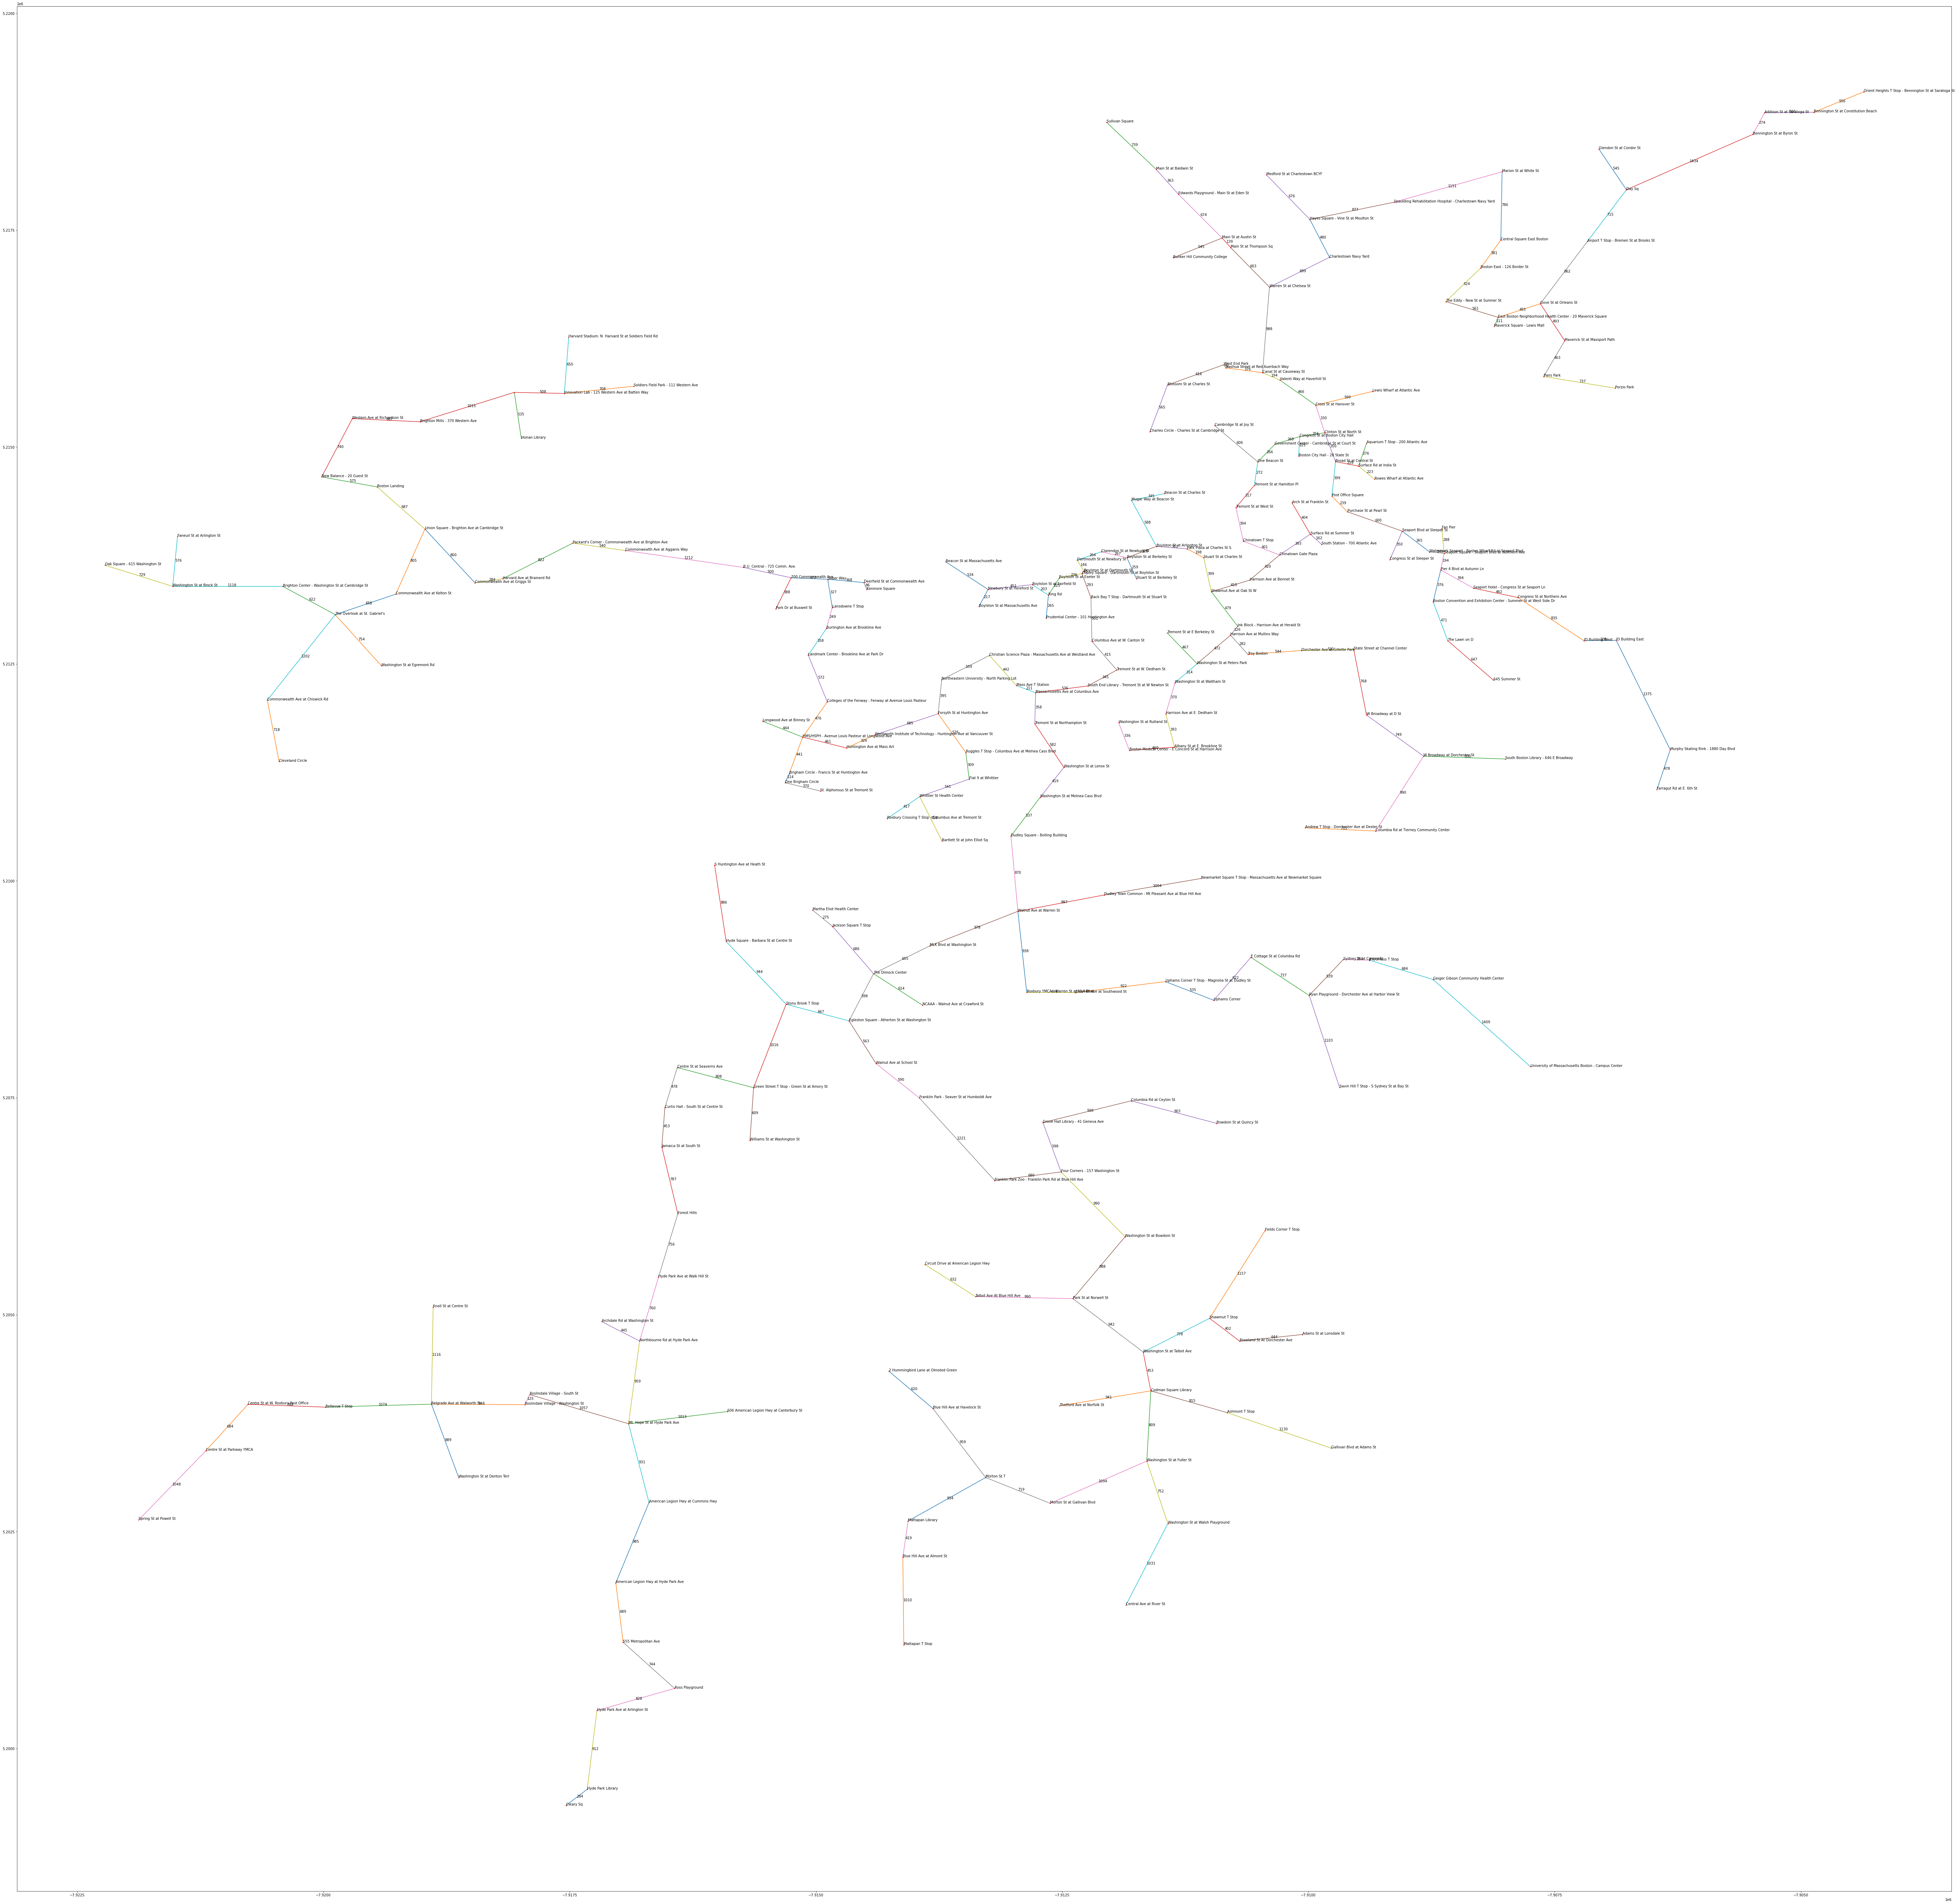

Total sum distances =  143099.35632617233


In [11]:
import sys
import pickle
import matplotlib.pyplot as plt

class Node:
  def __init__(self,X,Y,name,district,docks,id):
    self.X = X
    self.Y = Y
    self.name = name
    self.district = district
    self.docks = docks
    self.ID = id
    
class Graph:
  def __init__(self,num):
    self.numVertices = num
    self.graph = [[0 for i in range(num)] for j in range(num)]      #Create a 2D matrix with all 0s of size num
    self.vertices = []

def load_data():
    #loading from data Point
    f = open("Graph g.pkl","rb")
    g = pickle.load(f)
    f.close()
    return g
  
# computes the total weight sum of the MST
def sumMstWeight(parent, g):
    # Plotting all edges in the dictionary to check for unconnected components
    plt.figure(figsize=(75,75))
    sumValue = 0
    for i in range(1, len(parent)):
        dist = g.graph[i][parent[i]]
        x = [g.vertices[i].X, g.vertices[parent[i]].X]
        y = [g.vertices[i].Y, g.vertices[parent[i]].Y]
        plt.plot(x,y,marker="o",markersize=2,markeredgecolor="red") 
        plt.text(x[0], y[0], g.vertices[i].name)   
        plt.text(x[0] + ((x[1] - x[0]) / 2), y[0] + ((y[1] - y[0]) / 2), int(dist)   )

        sumValue += dist
    plt.show()
    return sumValue

# extracts the key which is the min weight from the vertices that have not been visited in the MST
def extract_min(key, inMST):
    currMinWeight, min_index = sys.maxsize, 0
    for i in range(0, len(key)):
        if (inMST[i] == False and key[i] < currMinWeight): # if not in MST and the min weight from vertex is smaller than current min weight
            currMinWeight, min_index = key[i], i  # reassigns current min weight and index
    return min_index
    
# Using Prim's algorithm to connect all the stations in Boston
def connectAllBostonStations() -> int:
    g = load_data()

    # the number of points in the points list
    size = g.numVertices

    # store the MST list, in the beginning will assign to None
    parent = [None]*size
    # holds the distance which is assigned to the max value
    key = [sys.maxsize]*size
    # mark if the vertex has been visited/in MST, default to false
    inMST = [False]*size

    key[0] = 0     # use first point in the pointsDict list to start
    parent[0] = -1 # the root of the MST (which doesn't have a parent)

    # loop through each point O(V^2)
    for _ in range(0, size):  
        u = extract_min(key, inMST)  # O(V)

        inMST[u] = True # mark true in inMST

        for j in range(0, size): # look for all of the adjacent vertices  O(V)

            if g.graph[u][j] == 0: # skip itself or edge between u and h is not connected
                continue; 

            # checks all adjacent vertices and if the adjacent vertex is already visited/in MST
            if inMST[j] == False:
                dist = g.graph[u][j]
                # compare the current vertex weight at j to the dist.
                # if it is greater than the dist, reassign the key and parent at j,
                # with the latest dist and u (new distance and parent).
                if key[j] > dist:  
                    key[j], parent[j] = dist, u
    # return the total minimum weight of the MST
    return sumMstWeight(parent, g)

print("Total sum distances = ", connectAllBostonStations())

# output: Total sum distances =  143099.35632617233